## Imports and Pre-requisites

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

## Data Loading

In [2]:
# load the data into a dataframe
df = pd.read_csv('Dataset-3/creditcard.csv')
print(df.shape)
df
# 31 columns (features) and 284807 rows (instances)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
# count the unique data types in each column
print(df.dtypes)
df.dtypes.value_counts()

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


float64    30
int64       1
Name: count, dtype: int64

## Numerical vs Categorical Features

In [7]:
# finding out the numerical features
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

# 31 (all) apparent numerical features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# finding out the categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

# no apparent categorical features

Index([], dtype='object')

## Distribution Visualization: Missing Values and Outliers Identification

In [12]:
# look for missing values in all the columns
print(df.isnull().sum())

# look for NaN values in all the columns
df.isna().sum()

# no missing values apparently

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


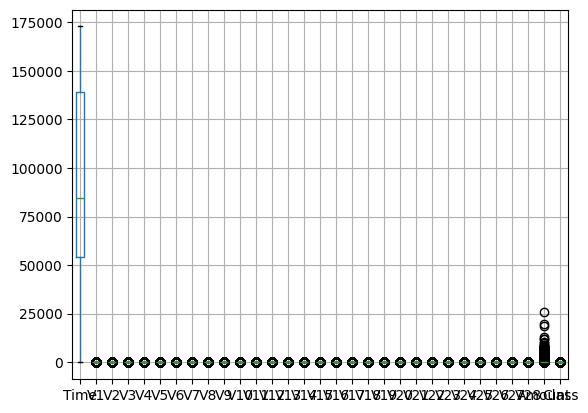

In [13]:
# look for outliers in all the numerical columns
df.boxplot(numerical_features.columns.to_list())
df.describe()

# SeniorCitizen is not a numerical feature, it is a categorical feature
# no outliers
# no boxplot for categorical features

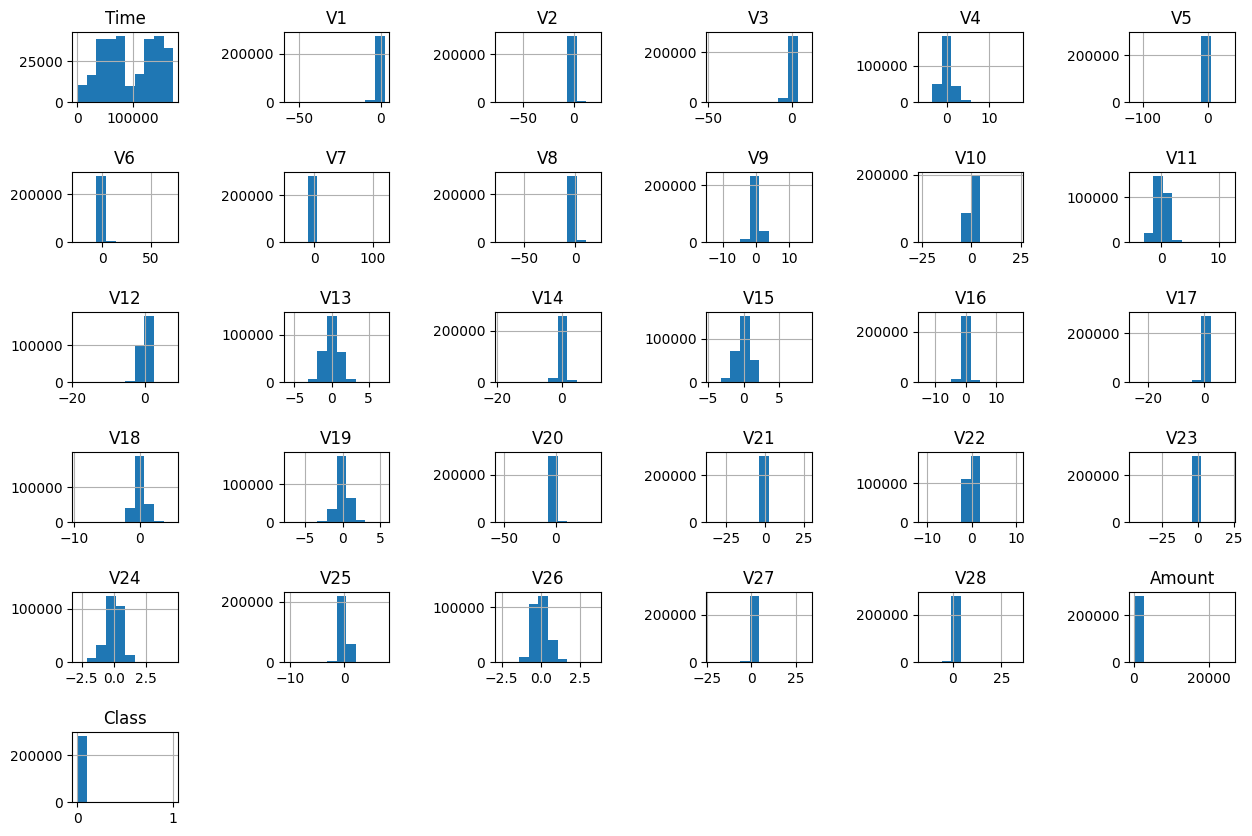

In [17]:
# look for the distribution of the numerical columns
df.hist(numerical_features.columns.to_list())

# increase the size of the figure, vertical and horizontal spacing between subplots
plt.rcParams['figure.figsize'] = [15, 10]
plt.subplots_adjust(hspace=1, wspace=1)

In [19]:
# # look for the distribution of the categorical columns
# # combine all the plots into one
# fig, axes = plt.subplots(6, 3, figsize=(25, 12))
# for idx, cat_col in enumerate(categorical_features):
#     row, col = idx//3, idx%3
#     sns.countplot(x=cat_col, data=df, ax=axes[row, col])
# plt.subplots_adjust(hspace=1)

In [9]:
# Further inspect TotalCharges column
# Why?
# Because it is a numerical column (clear from the distribution) but it is not included in the numerical_features list
# And the graph above shows that it is a categorical column
# So, there must be some non-numeric values in the column

print(df['TotalCharges'].dtypes)

# look for values that are not numeric in TotalCharges column
print(df['TotalCharges'].str.contains(r'[0-9]').value_counts())

# extract the index of the rows that have non-numeric values in TotalCharges column
idx = df[df['TotalCharges'].str.contains(r'[0-9]') == False].index

df['TotalCharges'].loc[idx]

# replace the empty ' ' values with NaN

object
TotalCharges
True     7032
False      11
Name: count, dtype: int64


488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

## Observations

1. `SeniorCitizen` is a categorical feature but is represented as a numerical feature.
2. `TotalCharges` is a numerical feature but has missing values which are represented as blank spaces in the data. We will need to impute these values.
3. There are no outliers in the numerical features.
4. We will need to drop the customerID column as it is not useful for our analysis.
5. `No internet service` and `No phone service` are not different from `No` and can be replaced with `No`.

## Next Steps

1. Handle missing values and outliers. **(Cleaning)**
    - Impute missing values in TotalCharges column. **(Imputation)**
    - Drop customerID column. **(Dropping)**
    - Replace `No internet service` and `No phone service` with `No`. **(Modifying)**
2. Convert categorical features to numerical features. **(Encoding)**
3. Train-test split. **(Splitting)**
4. Scale the numerical features. **(Scaling/Normalization/Standardization)**

## Data Cleaning

[Imputation Reference](https://scikit-learn.org/stable/modules/impute.html#impute)

In [10]:
# Imputation

# Declare a simple imputer object with strategy as 'mean'
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

# replace ' ' values with NaN
df['TotalCharges'].replace(' ', np.nan, inplace=True)

# Fit transform the imputer object on the columns with missing values
df['TotalCharges'] = mean_imputer.fit_transform(df['TotalCharges'].values.reshape(-1,1))

df['TotalCharges'][idx]

488     2283.300441
753     2283.300441
936     2283.300441
1082    2283.300441
1340    2283.300441
3331    2283.300441
3826    2283.300441
4380    2283.300441
5218    2283.300441
6670    2283.300441
6754    2283.300441
Name: TotalCharges, dtype: float64

In [11]:
# Dropping

# drop the customerID column
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
# Modifying

df['MultipleLines'].replace('No phone service', 'No', inplace=True)
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[i].replace('No internet service', 'No', inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
# Modify the target column values
df['Churn'].replace({'Yes':1, 'No':0}, inplace=True)

# Separate the features and target
y = df['Churn']
X = df.drop('Churn', axis=1)

print(X.shape)
print(y.shape)
y

(7043, 19)
(7043,)


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Categorical Feature Encoding

[Encoding Reference](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

In [14]:
# One-hot encoding using pandas
X = pd.get_dummies(X, columns=['InternetService', 'Contract', 'PaymentMethod']) # these columns have more than 2 categories
X = pd.get_dummies(X, drop_first=True).astype('float64') # these columns have only 2 categories
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,...,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,34.0,56.95,1889.50,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7039,0.0,72.0,103.20,7362.90,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7040,0.0,11.0,29.60,346.45,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7041,1.0,4.0,74.40,306.60,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train-Test Split 

#### Before Scaling to prevent data leakage from test set and to avoid overfitting

[Train-Test Split Reference](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)

In [15]:
# Split the data into train and test sets in 80-20 ratio

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 26)
(1409, 26)
(5634,)
(1409,)


## Scaling/Standardization

[Standardization Reference](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling), [Splitting Scaling Order Reference](https://medium.com/@megha.natarajan/scaling-data-before-or-after-train-test-split-35e9a9a7453f#:~:text=By%20splitting%20first%2C%20you%20ensure,information%20from%20the%20test%20set.)

In [16]:
# Scale the numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform the training data, save the scaling parameters for future use in test data
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

# return as numpy array
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


## Feature Selection: Information Gain Calculation

Index(['Contract_Month-to-month', 'tenure', 'Contract_Two year',
       'InternetService_Fiber optic', 'TotalCharges', 'MonthlyCharges',
       'PaymentMethod_Electronic check', 'InternetService_No', 'Partner_Yes',
       'PaperlessBilling_Yes'],
      dtype='object')

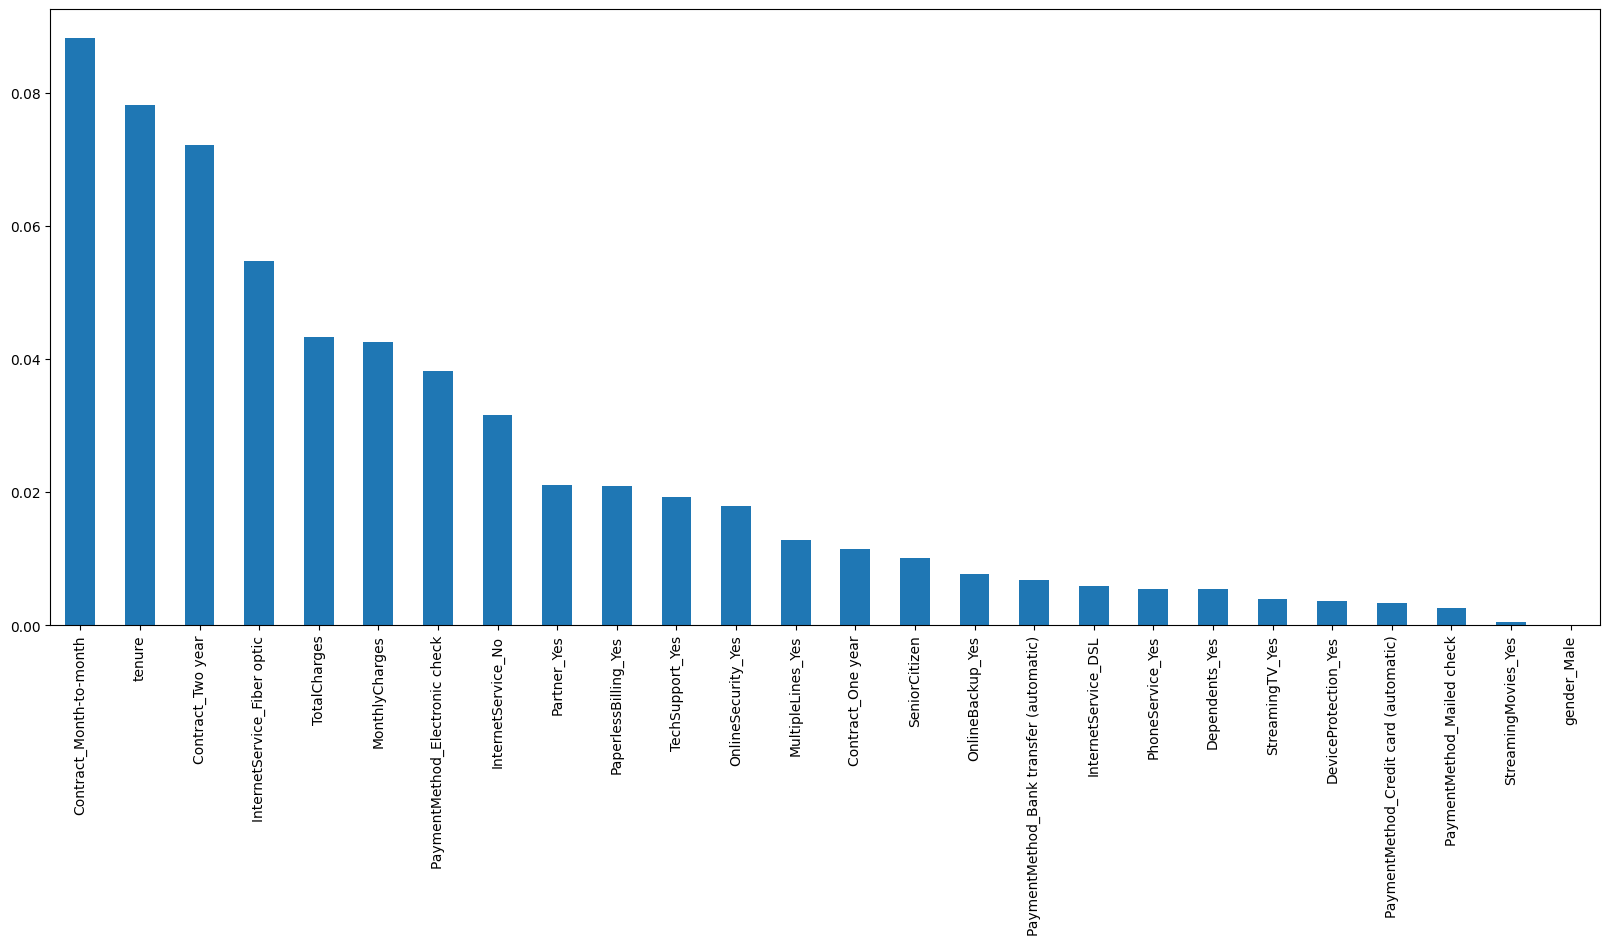

In [17]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

# sort the mutual information values in descending order
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

# plot the mutual information values
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

# select the top 10 features manually
selected_top_columns = mutual_info.sort_values(ascending=False).head(10).index
selected_top_columns
